<a href="https://colab.research.google.com/github/sds-capstone/2022-09-proj7-women-at-table/blob/emergency-funds-eda/Emergency_Funds_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# imports
import pandas as pd
# import pipe
import numpy as np
import seaborn as sns
import plotnine as p9
import matplotlib.pyplot as plt

In [6]:
file = 'https://raw.githubusercontent.com/sds-capstone/2022-09-proj7-women-at-table/main/findex_SubSahAfrica.csv'
df = pd.read_csv(file, index_col=0)
print(f'There are {df.shape[0]} entries and {df.shape[1]} features')
df.head()

There are 35000 entries and 105 features


,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy
12138,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,143101339,1.909609,1,60.0,1.0,1,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN
12139,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,123998301,2.075761,1,45.0,1.0,1,...,4,4,4,4.0,3,1.0,0.0,NaN,0.0,NaN
12140,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,157155643,0.785666,1,27.0,3.0,4,...,4,4,4,4.0,4,2.0,1.0,1.0,0.0,0.0
12141,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,155618899,1.450568,2,24.0,1.0,2,...,4,4,4,4.0,3,5.0,0.0,NaN,0.0,NaN
12142,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,143861320,0.461588,1,22.0,1.0,5,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN


In [7]:
#Copy data to new dataframe to wrangle
df2 = df

#Assign Categories fin24 - "Possiblity of Coming Up with Emergency Funds"
df2.loc[df2['fin24'] == 1, "fin24"] = 'Possible'
df2.loc[df2['fin24'] == 2, "fin24"] = 'Not Possible'
df2.loc[df2['fin24'] == 3, "fin24"] = 'Don\'t Know'
df2.loc[df2['fin24'] == 4, "fin24"] = 'Refuse'

#Assign Categories fin25 - "Main Source of Emergency Funds"
df2.loc[df2['fin25'] == 1, "fin25"] = 'Savings'
df2.loc[df2['fin25'] == 2, "fin25"] = 'Family, relatives, or friends'
df2.loc[df2['fin25'] == 3, "fin25"] = 'Money from working'
df2.loc[df2['fin25'] == 4, "fin25"] = 'Borrowing from a bank/employer/private lender'
df2.loc[df2['fin25'] == 5, "fin25"] = 'Selling assets'
df2.loc[df2['fin25'] == 6, "fin25"] = '(Some other source)'
df2.loc[df2['fin25'] == 7, "fin25"] = 'Don\'t Know'
df2.loc[df2['fin25'] == 8, "fin25"] = 'Refuse'

# rename fin24 to has_access
df2.rename(columns = {'fin24': 'possibility_of_access', 'fin25': 'main_source_funds'}, inplace = True)
df2.filter(["possibility_of_access","main_source_funds"]).head()



,possibility_of_access,main_source_funds
12138,Not Possible,NaN
12139,Possible,Money from working
12140,Possible,Money from working
12141,Possible,"Family, relatives, or friends"
12142,Not Possible,NaN


[Text(0.5, 1.0, 'Distribution of Access to Emergency Funds')]

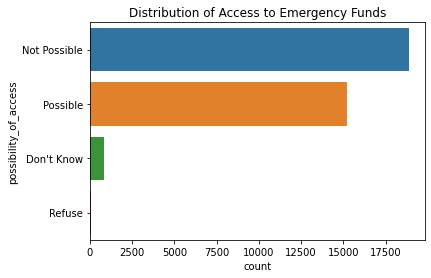

In [8]:
sns.countplot(y = 'possibility_of_access', data = df2).set(title = "Distribution of Access to Emergency Funds")

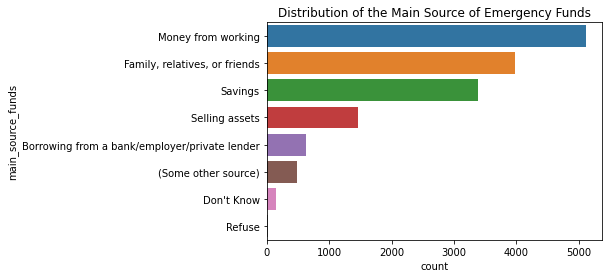

In [15]:
chart = sns.countplot(y = 'main_source_funds', 
                      data = df2, 
                      order = ["Money from working","Family, relatives, or friends",
                               "Savings", "Selling assets",
                               "Borrowing from a bank/employer/private lender", "(Some other source)",
                               "Don\'t Know", "Refuse"]).set(
                      title = "Distribution of the Main Source of Emergency Funds")